## Main Task
**Netflix Content Strategy Analysis** we need data based on content titles, type (show or movie), genre, language, and release details (date, day of the week, season) to understand timing and content performance!  

**Content Strategy Analysis** means analyzing how content is created, released, distributed, and consumed to achieve specific goals, such as maximizing audience engagement, viewership, brand reach, or revenue!

### Data Understanding
The dataset consists of Netflix content released globally in 2023, containing information on the title, release date, language, content type (show or movie), availability status, and viewership hours.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('datasets/netflix_content_2023.csv')

In [3]:
dataset.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie


In [4]:
dataset.columns

Index(['Title', 'Available Globally?', 'Release Date', 'Hours Viewed',
       'Language Indicator', 'Content Type'],
      dtype='object')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                24812 non-null  object
 1   Available Globally?  24812 non-null  object
 2   Release Date         8166 non-null   object
 3   Hours Viewed         24812 non-null  object
 4   Language Indicator   24812 non-null  object
 5   Content Type         24812 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


In [6]:
dataset.isnull().sum()

Title                      0
Available Globally?        0
Release Date           16646
Hours Viewed               0
Language Indicator         0
Content Type               0
dtype: int64

### Maximize Viewer Engagement
#### Which titles have the highest and lowest 'Hours Viewed'?

In [7]:
# Preprocessing the 'Hours Viewed' column
dataset['Hours Viewed'] = dataset['Hours Viewed'].replace(',', '', regex=True).astype(float)

In [8]:
dataset.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000.0,Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,507700000.0,English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000.0,English,Movie


In [10]:
# Sort the dataset by 'Hours Viewed' in ascending order
sorted_dataset = dataset.sort_values(by='Hours Viewed')

# Select the top 3 least viewed and top 3 most viewed titles
least_viewed = sorted_dataset.head(3)
most_viewed = sorted_dataset.tail(3)

In [16]:
print("Most Viewed Titles: ")
most_viewed.head()

Most Viewed Titles: 


,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
18227,King the Land: Limited Series // 킹더랜드: 리미티드 시리즈,Yes,2023-06-17,630200000.0,Korean,Movie
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show


In [17]:
print("Least Viewed Titles: ")
least_viewed.head()

Least Viewed Titles: 


,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
24811,Zach Galifianakis: Live at the Purple Onion,No,NaN,100000.0,English,Movie
15898,Jay and Silent Bob Strike Back,No,NaN,100000.0,English,Movie
15897,Jay and Silent Bob Reboot,No,NaN,100000.0,English,Movie


#### How does 'Content Type' (e.g., movie, series) correlate with 'Hours Viewed'?

In [19]:
# Group by 'Content Type' and calculate the mean 'Hours Viewed'
content_type_grouped = dataset.groupby('Content Type')['Hours Viewed'].mean().reset_index()

# Sort the values for better visualization
content_type_grouped = content_type_grouped.sort_values(by='Hours Viewed', ascending=False)

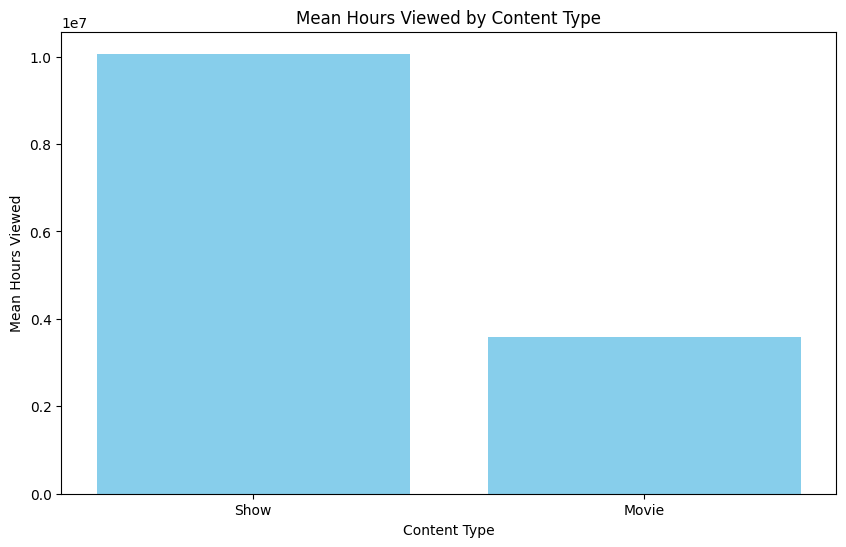

In [22]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(content_type_grouped['Content Type'], content_type_grouped['Hours Viewed'], color='skyblue')
plt.xlabel('Content Type')
plt.ylabel('Mean Hours Viewed')
plt.title('Mean Hours Viewed by Content Type')
plt.show()

> The visualization indicates that shows dominate the total viewership hours on Netflix in 2023 compared to movies. This suggests that Netflix’s content strategy leans heavily toward shows, as they tend to attract more watch hours overall!  